# Introduction

The goal of this project is to understand the relationship between a country's economic development and the life expectancy of its population. This project analyzes data on Gross Domestic Product (GDP) and life expectancy from the World Health Organization (WHO) and the World Bank for six countries.

This project seeks to answer the following questions:
- How have life expectancy and GDP changed over the years for each country?
- Is there a clear relationship between GDP and life expectancy?

The project uses visualizations, including line plots and scatter plots, to explore trends and correlations in the data.

**Data sources**

- GDP: [World Bank](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD) national accounts data and OECD National Accounts data files.
- Life expectancy: [World Health Organization](http://apps.who.int/gho/data/node.main.688)

## Import the neccessary modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data

In [2]:
df = pd.read_csv("all_data.csv")
df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


**Checking if there are any missing values** 

In [3]:
print(df.isnull().sum())

Country                             0
Year                                0
Life expectancy at birth (years)    0
GDP                                 0
dtype: int64


**Changing the column name**

In [4]:
df = df.rename({"Life expectancy at birth (years)":"LifeExpectancy"}, axis = "columns")
df.head()

,Country,Year,LifeExpectancy,GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


## Explore Data

The dataset contains information for six countries, covering the years 2000 through 2015.

In [5]:
print(df.Country.unique())
print(df.Year.unique())
countries = df.Country.unique()
# Create a color palette with one color per country
palette = sns.color_palette("Set2", n_colors=len(countries))

# Map each country to its color
country_colors = dict(zip(countries, palette))

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']
[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


**The distribution of GDP and Life Expectancy**

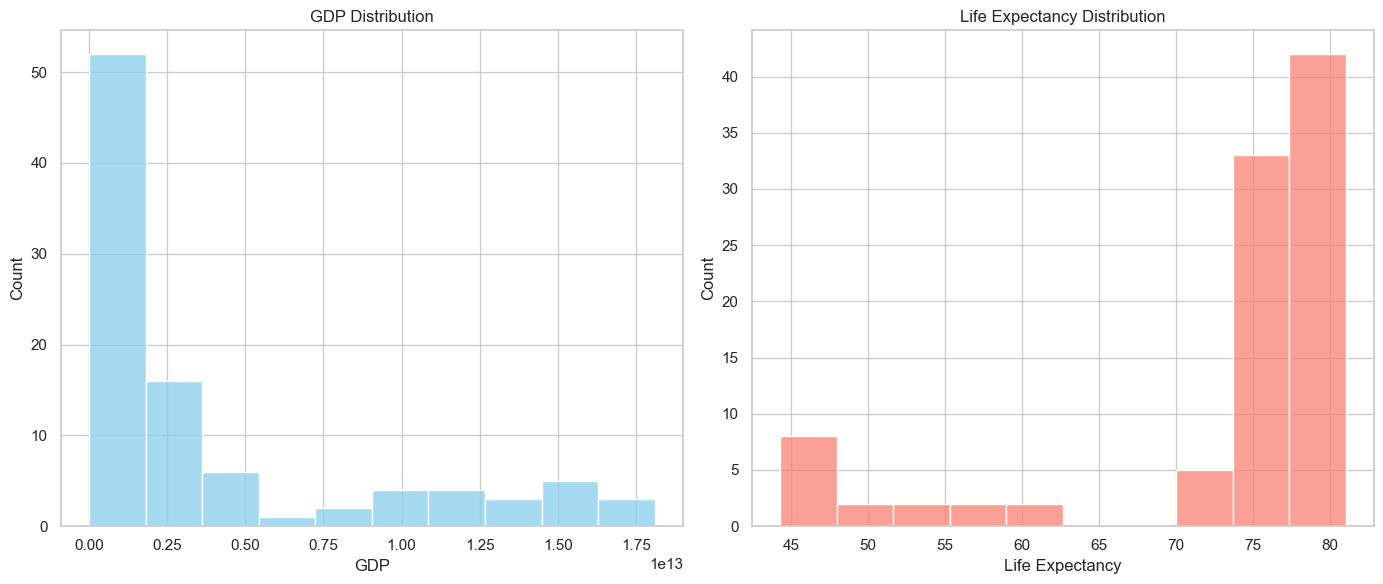

In [6]:
sns.set(style="whitegrid")

# Create a figure with 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(14,6))

# GDP histogram (like distplot)
sns.histplot(df['GDP'], bins=10, color='skyblue', ax=axes[0])
axes[0].set_title('GDP Distribution')
axes[0].set_xlabel('GDP')
axes[0].set_ylabel('Count')

# Life Expectancy histogram (like distplot)
sns.histplot(df['LifeExpectancy'], bins=10, color='salmon', ax=axes[1])
axes[1].set_title('Life Expectancy Distribution')
axes[1].set_xlabel('Life Expectancy')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

In [11]:
#Calculating the mean 
dfMeans = df.drop("Year", axis = 1).groupby("Country").mean().reset_index()
dfMeans

,Country,LifeExpectancy,GDP
0,Chile,78.94375,1.697888e+11
1,China,74.26250,4.957714e+12
2,Germany,79.65625,3.094776e+12
3,Mexico,75.71875,9.766506e+11
4,United States of America,78.06250,1.407500e+13
5,Zimbabwe,50.09375,9.062580e+09


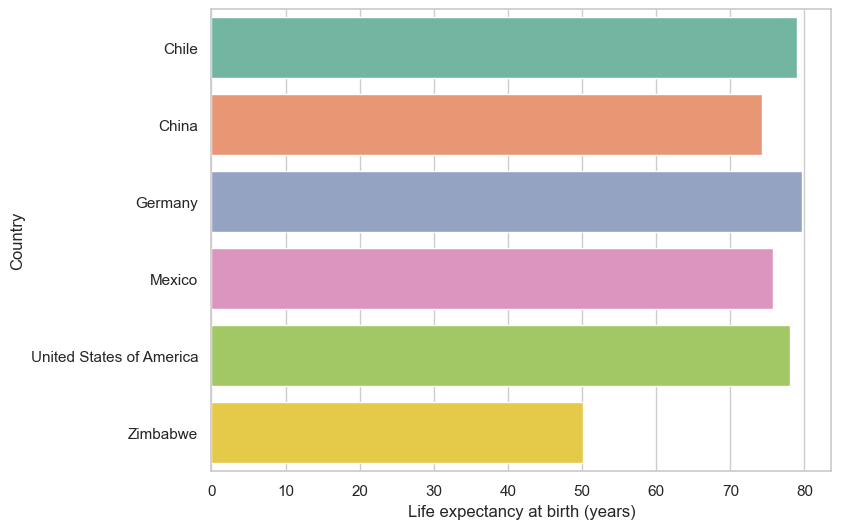

In [16]:
plt.figure(figsize=(8,6))
sns.barplot(x="LifeExpectancy", y="Country", hue="Country", data=dfMeans, palette=country_colors)
plt.xlabel("Life expectancy at birth (years)");

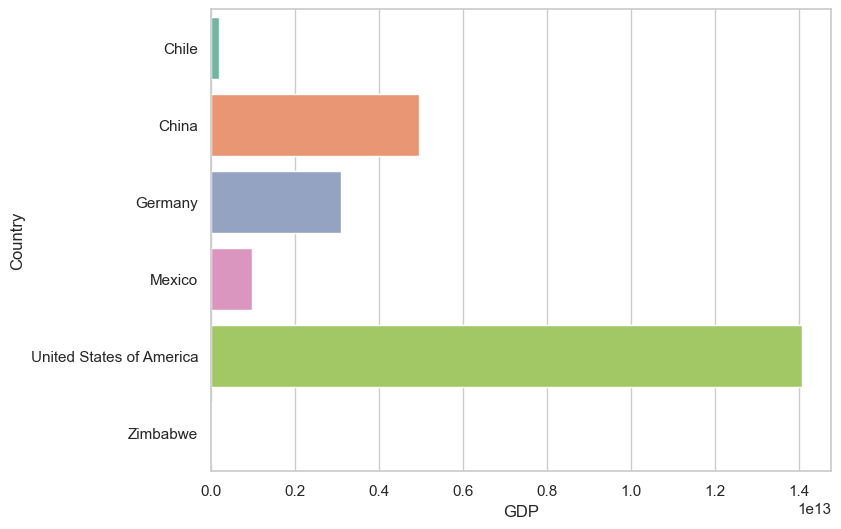

In [17]:
plt.figure(figsize=(8,6))
sns.barplot(x="GDP", y="Country", hue="Country", data=dfMeans, palette=country_colors)
plt.xlabel("GDP");

**Line plots**

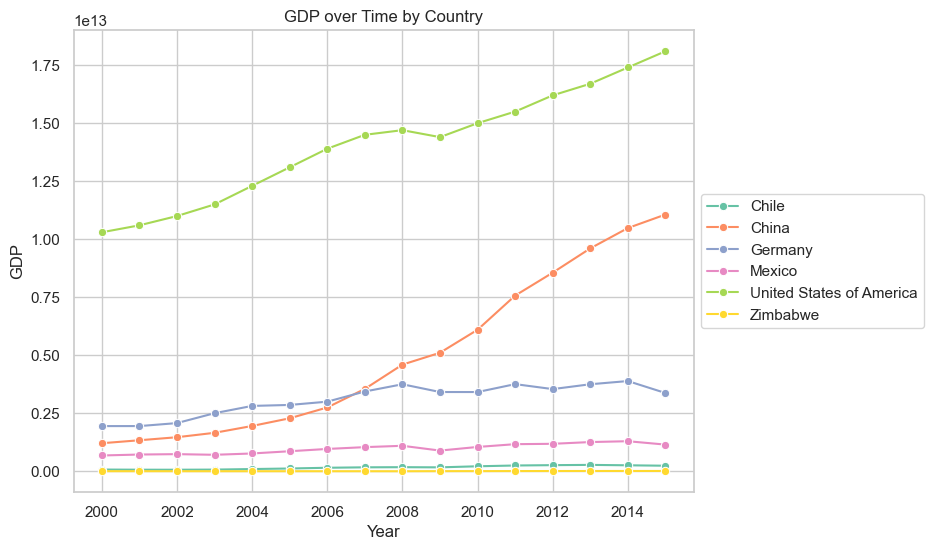

In [7]:
plt.figure(figsize=(8,6))

# Line plot
sns.lineplot(data=df, x="Year", y="GDP", hue="Country", marker="o", palette=country_colors)

# Axis labels
plt.xlabel("Year")
plt.ylabel("GDP")

# Legend outside
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)

# Title
plt.title("GDP over Time by Country")

# Show plot
plt.show()


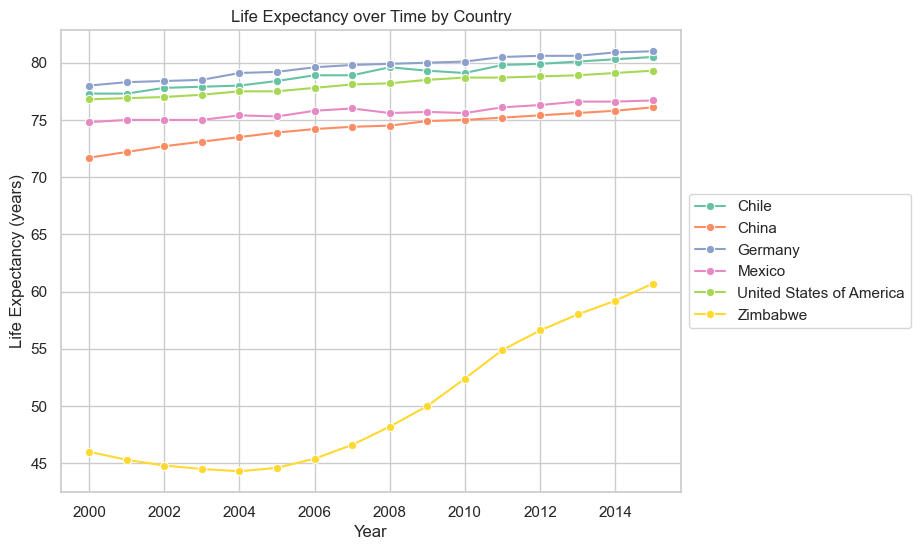

In [8]:
plt.figure(figsize=(8,6))

# Line plot for Life Expectancy
sns.lineplot(data=df, x="Year", y="LifeExpectancy", hue="Country", marker="o", palette=country_colors)

# Axis labels
plt.xlabel("Year")
plt.ylabel("Life Expectancy (years)")

# Title
plt.title("Life Expectancy over Time by Country")

# Legend outside
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)

# Show plot
plt.show()

Because the trends of several countries are very similar, each country will be plotted separately to highlight the differences more clearly.

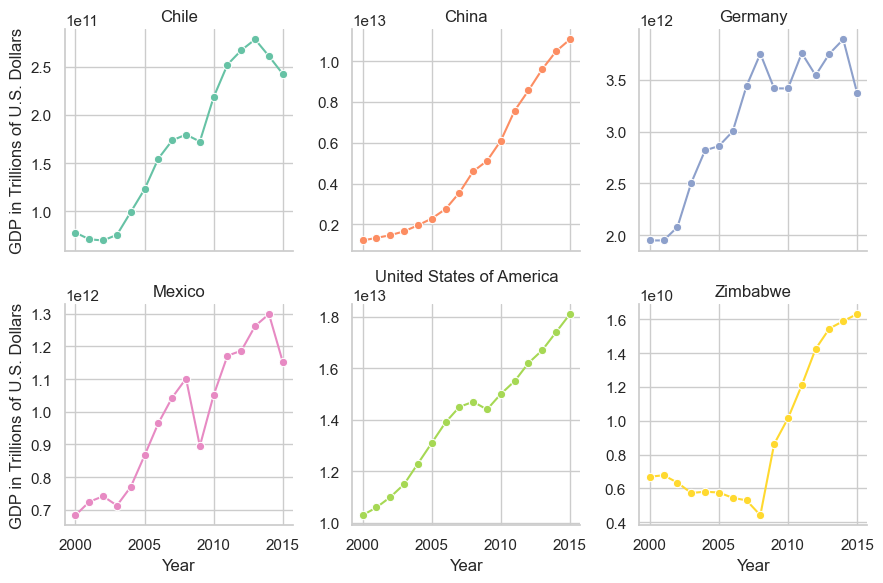

In [9]:

graphGDP = sns.FacetGrid(df, col="Country", col_wrap=3,
                         hue="Country", palette=country_colors, sharey=False)
graphGDP = (graphGDP.map(sns.lineplot, "Year", "GDP", marker="o")
            .set_axis_labels("Year", "GDP in Trillions of U.S. Dollars")
            .set_titles("{col_name}"))
graphGDP.tight_layout()
plt.show()

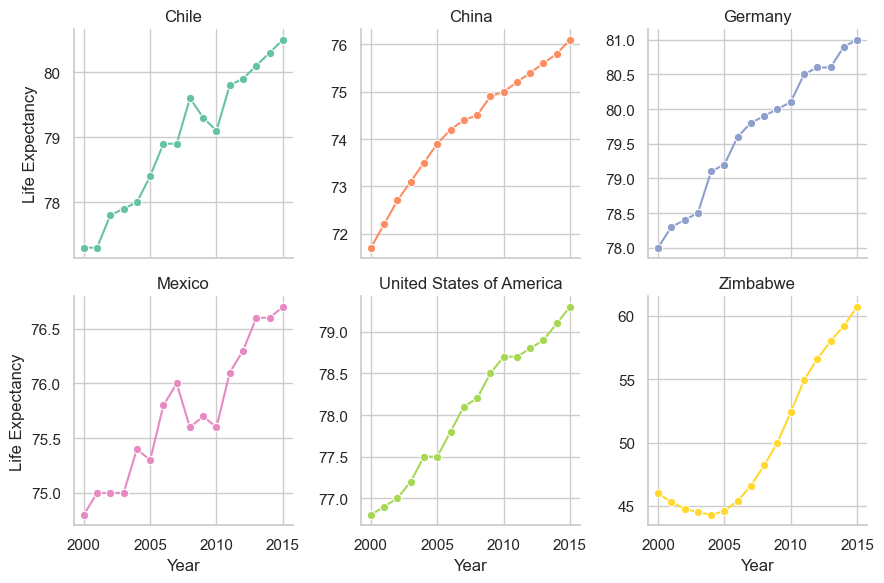

In [10]:
graphLE = sns.FacetGrid(df, col="Country", col_wrap=3,
                         hue="Country", palette=country_colors, sharey=False)
graphLE = (graphLE.map(sns.lineplot, "Year", "LifeExpectancy", marker="o")
            .set_axis_labels("Year", "Life Expectancy")
            .set_titles("{col_name}"))
graphLE.tight_layout()
plt.show()

**Scatter plots GDP vs Life Expectancy**

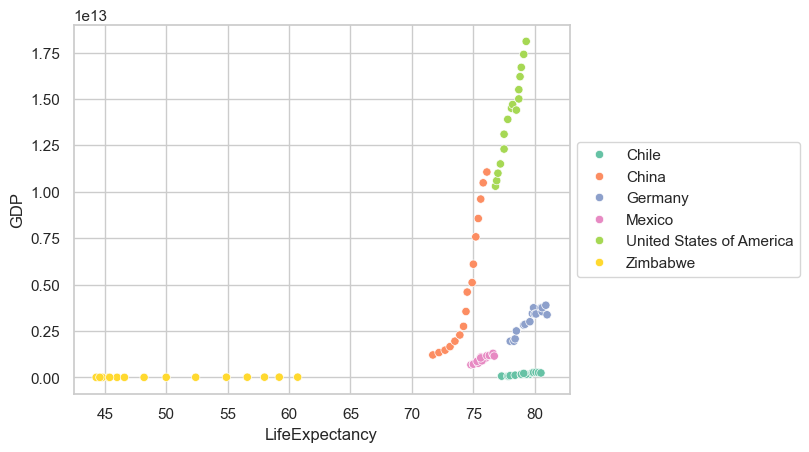

In [20]:
sns.scatterplot(x=df.LifeExpectancy, y=df.GDP, hue=df.Country, palette = country_colors).legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1);

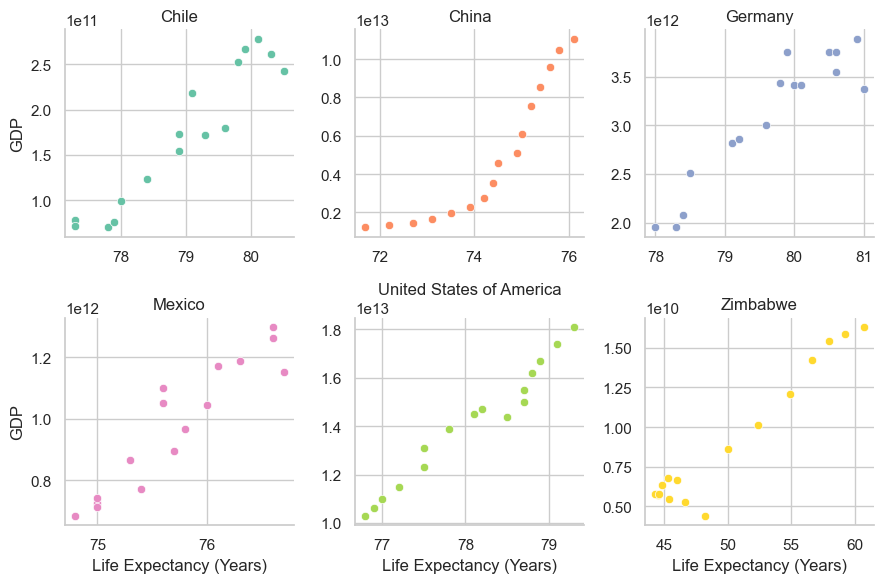

In [26]:
graphVS = sns.FacetGrid(df, col="Country", col_wrap=3,
                         hue="Country", palette=country_colors, sharex=False, sharey=False)
graphVS = (graphVS.map(sns.scatterplot, "LifeExpectancy", "GDP")
            .set_axis_labels("Life Expectancy (Years)", "GDP")
            .set_titles("{col_name}"))
graphVS.tight_layout()
plt.show()